# Import Libraries


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [86]:
train_df = pd.read_csv(r'C:\Users\Hp\Documents\titanic\train.csv')
test_df  = pd.read_csv(r'C:\Users\Hp\Documents\titanic\test.csv')

# Exploratory Data Analysis

Display first few rows

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


INFO

In [89]:
print(f"Number of Rows in Train Dataset: {train_df.shape[0]}, and No. of Columns in Train Dataset: {train_df.shape[1]}")
print(f"Number of Rows in Test Dataset: {test_df.shape[0]}, and No. of Columns in Test Dataset: {test_df.shape[1]}")

Number of Rows in Train Dataset: 891, and No. of Columns in Train Dataset: 12
Number of Rows in Test Dataset: 418, and No. of Columns in Test Dataset: 11


Descriptive Statistics

In [90]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Checking Missing Values

In [93]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Drop Column

In [95]:
# Drop Unnecessary Columns
train_df.drop(columns=['Cabin','Name', 'Ticket'], inplace=True)
train_df.head()

test_df.drop(columns=['Cabin','Name', 'Ticket'], inplace=True)


Deal with Missing Values

In [96]:
#Fill missing 'Embarked' values with the mode.
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Fill missing 'Age' values with the median.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median()).astype(int)


#Fill missing 'Fare' values with the mode.
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mode()[0])

#Fill missing 'Embarked' values with the mode.
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# Fill missing 'Age' values with the median.
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

Creating New Features

In [97]:
# Create a new column 'FamilySize' by adding 'SibSp' and 'Parch'.
train_df['Family_Size']= train_df['SibSp'] + train_df['Parch'] 

test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']


In [98]:
# Use .get() to handle missing columns
train_df['IsAlone'] = (train_df['Family_Size'] == 0).astype(int)

test_df['IsAlone'] = (test_df['Family_Size'] == 0).astype(int)


In [99]:
train_df.drop(columns=['SibSp', 'Parch'], inplace=True)

test_df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [100]:
sex_mapping = {'male': 1, 'female': 0}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)

sex_mapping = {'male': 1, 'female': 0}
test_df['Sex'] = test_df['Sex'].map(sex_mapping)


embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size,IsAlone
0,1,0,3,1,22,7.2500,2,1,0
1,2,1,1,0,38,71.2833,0,1,0
2,3,1,3,0,26,7.9250,2,0,1
3,4,1,1,0,35,53.1000,2,1,0
4,5,0,3,1,35,8.0500,2,0,1


In [102]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_Size,IsAlone
0,892,3,1,34.5,7.8292,1,0,1
1,893,3,0,47.0,7.0000,2,1,0
2,894,2,1,62.0,9.6875,1,0,1
3,895,3,1,27.0,8.6625,2,0,1
4,896,3,0,22.0,12.2875,2,2,0


In [103]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to standardize
numerical_cols = ['Age', 'Fare', 'Family_Size']

# Standardize the specified numerical columns
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])



numerical_cols = ['Age', 'Fare', 'Family_Size']
scaler = StandardScaler()
test_df[numerical_cols] = scaler.fit_transform(test_df[numerical_cols])

In [104]:
print(train_df["Survived"].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


# Data Visualization

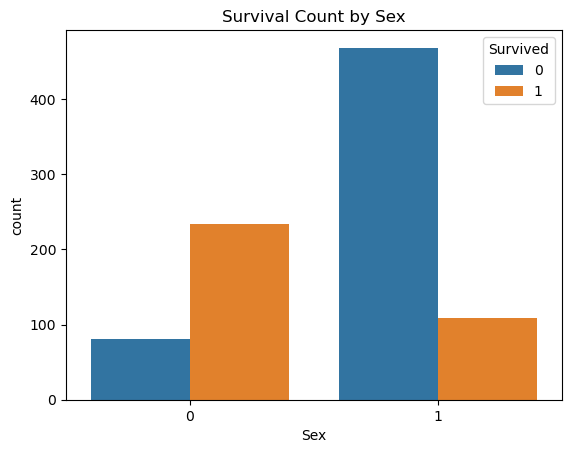

In [105]:
# Survived vs Sex
sns.countplot(x='Sex', hue='Survived', data= train_df)
plt.title('Survival Count by Sex')
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

# Separate the target (Survived) and features
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into train, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the split data sizes
print(X_train.shape, X_val.shape, X_test.shape)

(712, 8) (89, 8) (90, 8)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=159, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Validation Accuracy: 0.8876
Confusion Matrix:
[[45  4]
 [ 6 34]]


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate the target (Survived) and features
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a machine learning model (Logistic Regression)
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.45%


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate the target (Survived) and features
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracy results
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Display the accuracy of each model
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Accuracy: 80.45%
Random Forest Accuracy: 82.68%
Support Vector Machine Accuracy: 58.66%
K-Nearest Neighbors Accuracy: 58.10%


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the target (Survived) and features
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")


Decision Tree Model Accuracy: 75.42%


In [111]:
from sklearn.metrics import accuracy_score
# Separate the target (Survived) and features
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")


Random Forest Model Accuracy: 82.68%


In [112]:
predictions =  model.predict(test_df)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})


submission.to_csv('submission.csv', index=False)